### Sales Bike Analisis

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
## File Path

sales = pd.read_csv('sales_data.csv')

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [5]:
sales.head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


### Mencari Pendapatan Terbesar bedasarkan tahun

In [6]:
pendapatan = sales.loc[sales['Revenue'].idxmax()]

pendapatan_tertinggi = pendapatan['Year']
pendapatan_total = pendapatan['Revenue']

print('Pendapatan Tertinggi Terjadi Pada Tahun', pendapatan_tertinggi, 'Dengan Total Pendapatan', pendapatan_total)

Pendapatan Tertinggi Terjadi Pada Tahun 2015 Dengan Total Pendapatan 58074


In [7]:
# Mendapatkan 10 pendapatan terbesar
top_10_pendapatan = sales.nlargest(10, 'Revenue')

# Menampilkan hasil
print(top_10_pendapatan[['Year', 'Revenue']])

        Year  Revenue
112073  2015    58074
112072  2013    54069
71129   2011    14312
59919   2011    14169
68671   2011    14169
70307   2011    14169
70597   2011    14169
70601   2011    14169
70699   2011    14169
70745   2011    14169


#### Menghitung Produk yang sering dibeli bedasarkan tahun 

In [8]:
produk_terlaris = sales['Product'].value_counts().reset_index()
produk_terlaris.columns = ['Product', 'Total_Pembelian']

# Gabung data
merge_data = pd.merge(produk_terlaris, sales, on='Product')

# Menghitung umur rata-rata pembeli, negara asal dan tahun pembelian setiap produk
analisis = merge_data.groupby('Product').agg({
    'Customer_Age' : 'mean',
    'Country' : lambda x: ', '.join(x.unique()),
    'Year' : lambda x: ', '.join(map(str, x.unique()))
}).reset_index()

hasil_analisa = pd.merge(produk_terlaris, analisis, on='Product')

hasil_analisa.head(10)

,Product,Total_Pembelian,Customer_Age,Country,Year
0,Water Bottle - 30 oz.,10794,35.794515,"Australia, United States, France, Germany, Can...","2014, 2016, 2013, 2015"
1,Patch Kit/8 Patches,10416,35.836022,"Australia, United States, France, United Kingd...","2013, 2015, 2014, 2016"
2,Mountain Tire Tube,6816,35.944249,"United States, Australia, Canada, United Kingd...","2013, 2015, 2014, 2016"
3,AWC Logo Cap,4358,35.349702,"Australia, United States, Canada, France, Unit...","2013, 2015, 2014, 2016"
4,"Sport-100 Helmet, Red",4220,35.404265,"Australia, United States, United Kingdom, Cana...","2013, 2015, 2014, 2016"
5,Road Tire Tube,4176,34.522510,"United States, Canada, France, United Kingdom,...","2013, 2015, 2014, 2016"
6,"Sport-100 Helmet, Black",4152,35.998073,"Australia, United States, Germany, France, Can...","2013, 2015, 2014, 2016"
7,Fender Set - Mountain,4032,36.761409,"Australia, United States, Canada, Germany, Fra...","2013, 2015, 2014, 2016"
8,"Sport-100 Helmet, Blue",3788,37.655755,"United States, Australia, Canada, France, Germ...","2013, 2015, 2014, 2016"
9,Touring Tire Tube,3702,34.618585,"Australia, Germany, United States, United King...","2014, 2016, 2013, 2015"


### Produk 10 Produk Terlaris

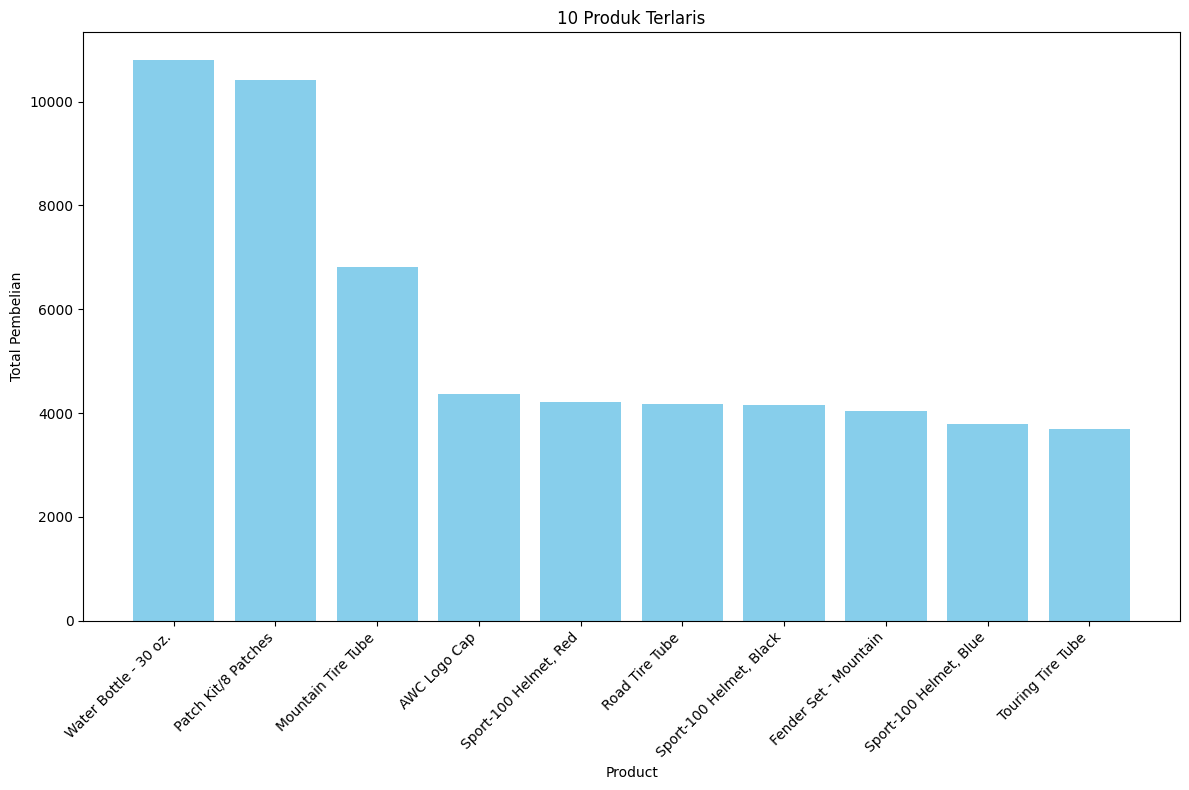

In [10]:
# Menampilkan 10 produk terlaris
top_10_produk = hasil_analisa.head(10)

# Membuat bar chart untuk total pembelian
plt.figure(figsize=(12, 8))
plt.bar(top_10_produk['Product'], top_10_produk['Total_Pembelian'], color='skyblue')
plt.xlabel('Product')
plt.ylabel('Total Pembelian')
plt.title('10 Produk Terlaris')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Menampilkan chart
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11528\2338533928.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_10_produk['Product'], rotation=45, ha='right')


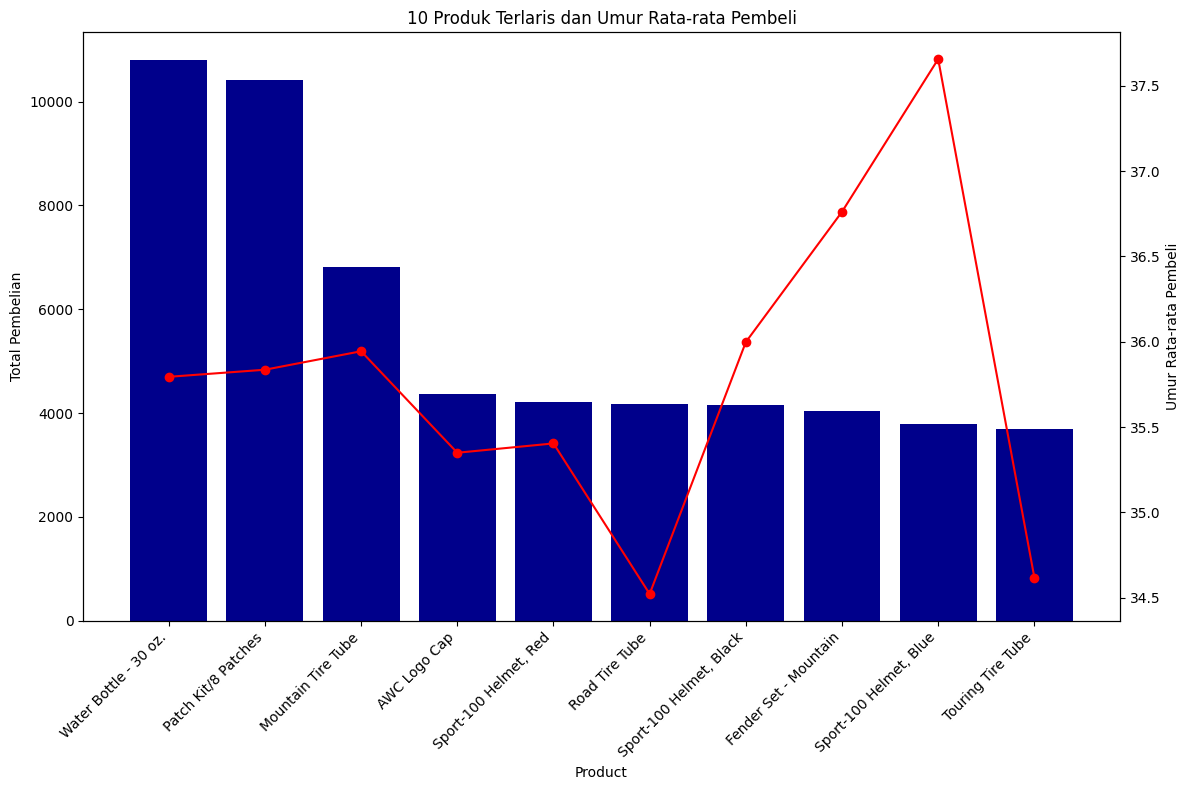

In [11]:
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar chart untuk total pembelian
ax1.bar(top_10_produk['Product'], top_10_produk['Total_Pembelian'], color='darkblue')
ax1.set_xlabel('Product')
ax1.set_ylabel('Total Pembelian', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticklabels(top_10_produk['Product'], rotation=45, ha='right')

# Line chart untuk umur rata-rata pembeli
ax2 = ax1.twinx()
ax2.plot(top_10_produk['Product'], top_10_produk['Customer_Age'], color='red', marker='o')
ax2.set_ylabel('Umur Rata-rata Pembeli', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('10 Produk Terlaris dan Umur Rata-rata Pembeli')
plt.tight_layout()

# Menampilkan chart
plt.show()

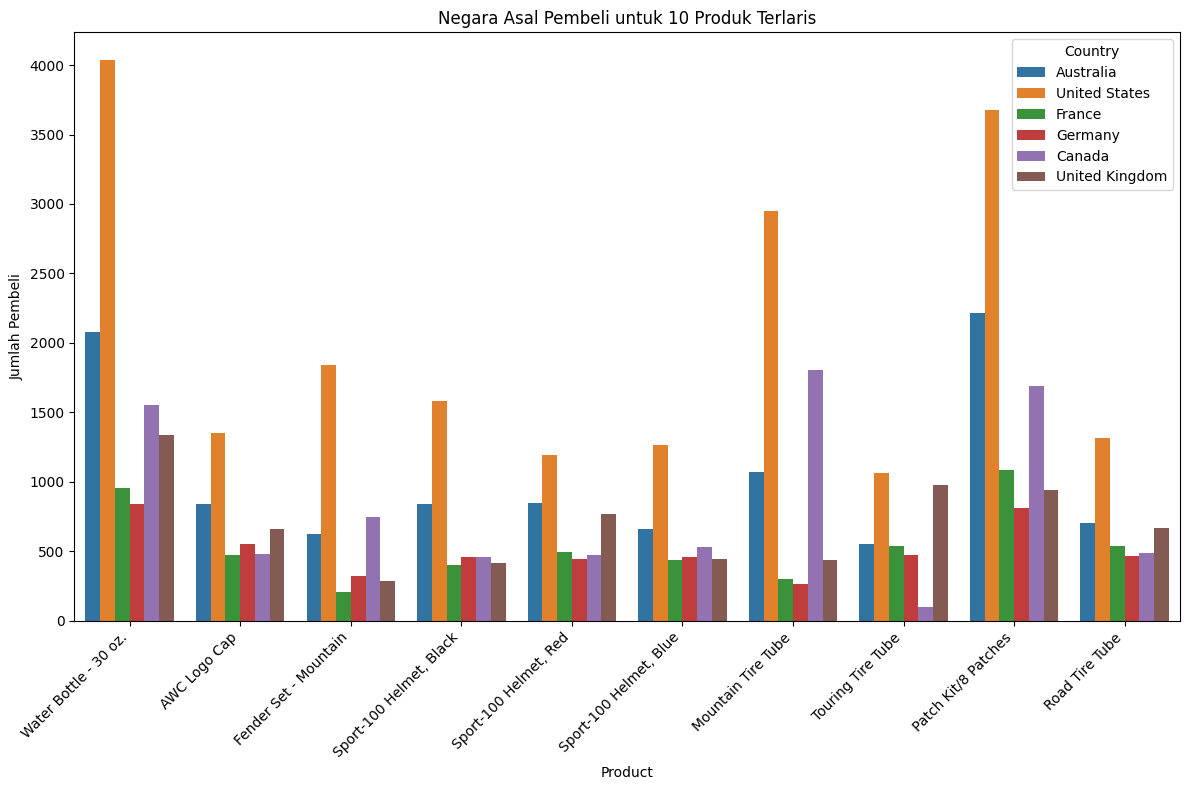

In [13]:
# Membuat bar chart untuk negara asal pembeli
plt.figure(figsize=(12, 8))
sns.countplot(data=sales[sales['Product'].isin(top_10_produk['Product'])], x='Product', hue='Country')
plt.xlabel('Product')
plt.ylabel('Jumlah Pembeli')
plt.title('Negara Asal Pembeli untuk 10 Produk Terlaris')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country')
plt.tight_layout()

# Menampilkan chart
plt.show()

#### Mencari Korelasi Unit_Cost, Unit_Price dengan Cost dan Revenue

In [17]:
Korelasi_Matrix = sales[['Unit_Cost', 'Unit_Price', 'Cost', 'Revenue']].corr()

print(Korelasi_Matrix)

            Unit_Cost  Unit_Price      Cost   Revenue
Unit_Cost    1.000000    0.997894  0.829869  0.817865
Unit_Price   0.997894    1.000000  0.826301  0.818522
Cost         0.829869    0.826301  1.000000  0.988758
Revenue      0.817865    0.818522  0.988758  1.000000


#### Visual Korelasi

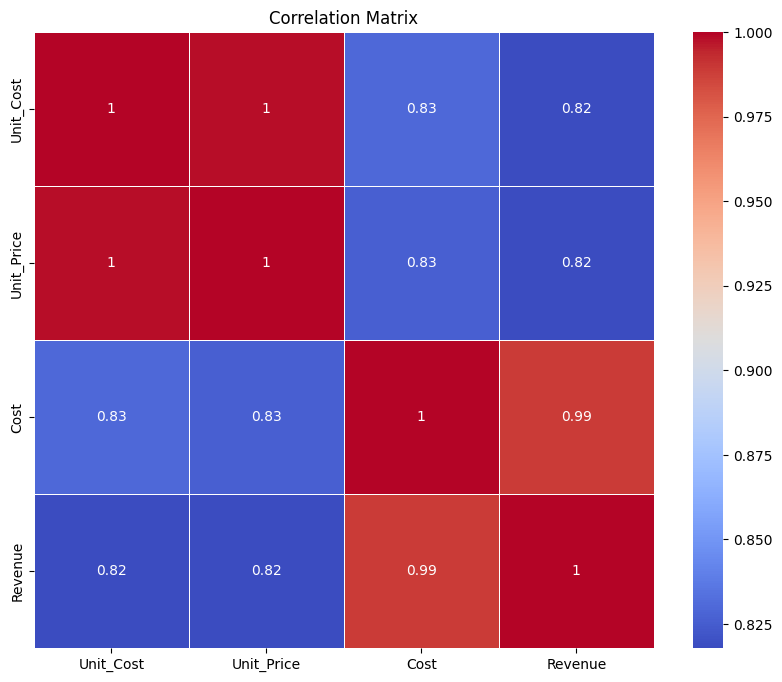

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(Korelasi_Matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Menyiapkan data untuk regresi
X_cost = sales[['Unit_Cost', 'Unit_Price']]
y_cost = sales['Cost']

# Menambahkan konstanta
X_cost = sm.add_constant(X_cost)

# Membuat model regresi
model_cost = sm.OLS(y_cost, X_cost).fit()

# Menampilkan ringkasan hasil regresi
print(model_cost.summary())

                            OLS Regression Results                            
Dep. Variable:                   Cost   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                 1.255e+05
Date:                Wed, 22 Jan 2025   Prob (F-statistic):               0.00
Time:                        23:20:52   Log-Likelihood:            -8.6129e+05
No. Observations:              113036   AIC:                         1.723e+06
Df Residuals:                  113033   BIC:                         1.723e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.6713      1.637     70.067      0.0